In [1]:
import matplotlib.pyplot as plt
import numpy as np
from objectFunc import StepCoverage
import torch

In [6]:
import depoML

In [2]:
result = torch.load('./log/result_new_1122_isminF_inputs.pt')

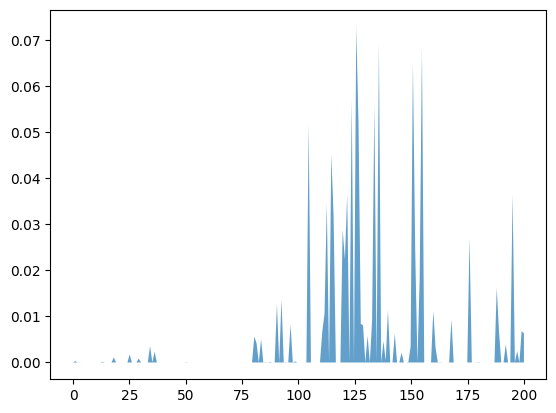

In [3]:
fig, ax = plt.subplots(sharex=True, sharey=True)

ax.fill_between(np.linspace(0, 200, 200), result[1310].data.cpu().numpy(), alpha=0.7)

(200,)
0.9999999
(999959,)


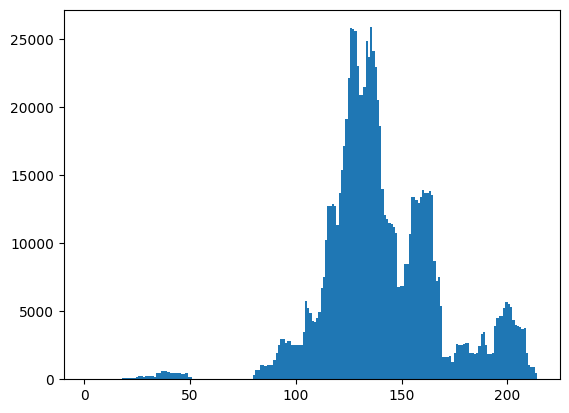

In [8]:
print(result[1310].data.cpu().numpy().shape)

histData = result[1310].data.cpu().numpy()
print(histData.sum())
hist = np.array([])
r = 1
for i in range(histData.shape[0]):
    inbin = np.random.rand(int(histData[i]*1e6))*15
    hist = np.concatenate((hist, inbin + i*r))

print(hist.shape)
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(hist, bins=200)

(999959,)


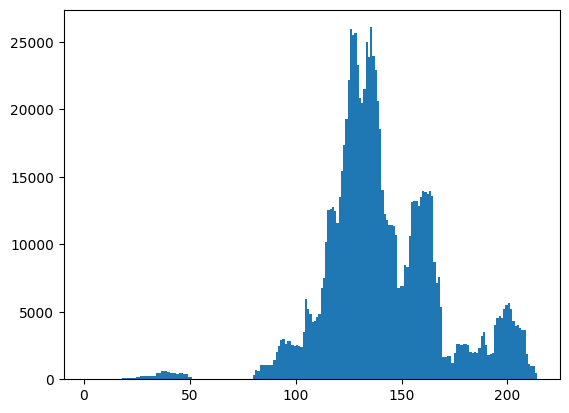

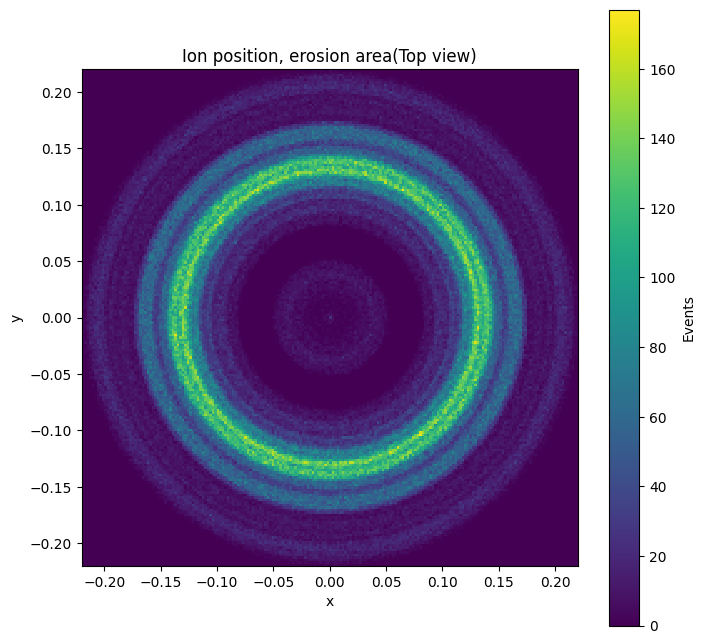

In [5]:
histData = result[1310].data.cpu().numpy()
hist = np.array([])
r = 1
for i in range(histData.shape[0]):
    inbin = np.random.rand(int(histData[i]*1e6))*15
    hist = np.concatenate((hist, inbin + i*r))

print(hist.shape)
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(hist, bins=200)

Ero_dist_x = np.array([])
Ero_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(int(n[i]))
    theta = np.random.rand(int(n[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(dist[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    Ero_dist_x = np.concatenate((Ero_dist_x, np.multiply((np.random.rand(int(n[i]))*r + i*r), np.cos(theta))))
    # print(np.array(Ero_dist_x).shape)
    Ero_dist_y = np.concatenate((Ero_dist_y, np.multiply((np.random.rand(int(n[i]))*r + i*r), np.sin(theta))))

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(Ero_dist_x, bins=xbins)
y_bins = np.histogram(Ero_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(Ero_dist_x, Ero_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [7]:
print(Ero_dist_x.shape)

(999959,)


In [27]:
print(220*220*25/101130)

11.96479778502917


909090.0423019405


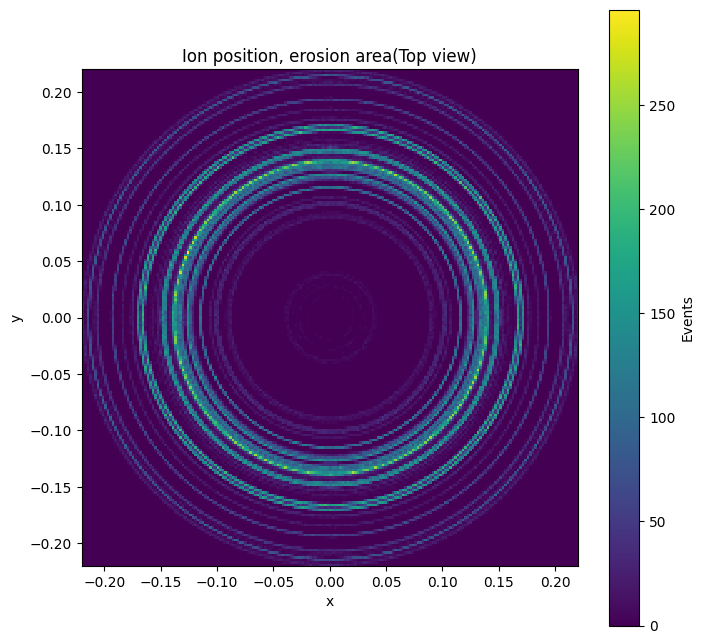

In [9]:
test_random = result[1310].data.cpu().numpy()
test_random_norm = test_random/(np.sum(test_random))
test_random_norm = test_random_norm * 909090
distGen = test_random_norm
print(distGen.sum())
distNorm = distGen*np.linspace(0, 0.22, 201)[1:]*2*np.pi     
gen_dist_x = np.array([])
gen_dist_y = np.array([])
bins = 200
r = 0.22/bins
for i in range(bins):
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [14]:
coordinates = [0, 0]

depofilm = depoML.depo(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=coordinates)
depotest = depofilm.run(4, 125, gen_dist_x, gen_dist_y)

In [15]:
film = np.zeros((200, 200, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 60
left_side = 75
right_side = 75
film[:, 200-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[200-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

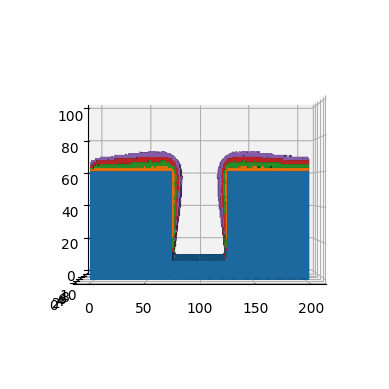

In [16]:
openWidth = 95

indice_wall = np.array(film[:, openWidth:200-openWidth, :] == 10)
# in_depo = np.logical_and(result[:, openWidth:200-openWidth, :] > 0, result[:, openWidth:200-openWidth, :] != 10)
in_depo = np.array(depotest[:, openWidth:200-openWidth, :] == 20)
# in_depo2 = np.logical_and(result2[:, openWidth:200-openWidth, :] > 0, result2[:, openWidth:200-openWidth, :] != 10, result2[:, openWidth:200-openWidth, :] != 20)
in_depo2 = np.array(depotest[:, openWidth:200-openWidth, :] == 40)
in_depo3 = np.array(depotest[:, openWidth:200-openWidth, :] == 60)
in_depo4 = np.array(depotest[:, openWidth:200-openWidth, :] == 80)
in_depo5 = np.array(depotest[:, openWidth:200-openWidth, :] == 100)
in_depo6 = np.array(depotest[:, openWidth:200-openWidth, :] == 120)
in_depo7 = np.array(depotest[:, openWidth:200-openWidth, :] == 140)
in_depo8 = np.array(depotest[:, openWidth:200-openWidth, :] == 160)
# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(in_depo5)
ax.voxels(in_depo6)
ax.voxels(in_depo7)
ax.voxels(in_depo8)
ax.view_init(elev=0, azim=-90, roll=0)

In [17]:
np.linspace(0,0.21,3)

array([0.   , 0.105, 0.21 ])

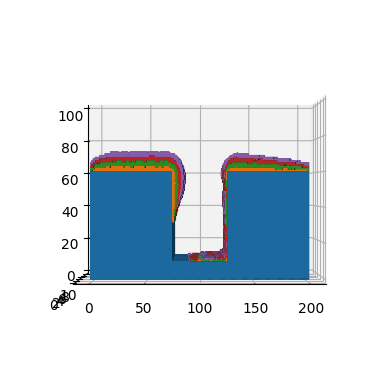

In [18]:
coordinates = [0, 0.105]

depofilm = depoML.depo(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=coordinates)
depotest2 = depofilm.run(4, 125, gen_dist_x, gen_dist_y)

openWidth = 95

indice_wall = np.array(film[:, openWidth:200-openWidth, :] == 10)
# in_depo = np.logical_and(result[:, openWidth:200-openWidth, :] > 0, result[:, openWidth:200-openWidth, :] != 10)
in_depo = np.array(depotest2[:, openWidth:200-openWidth, :] == 20)
# in_depo2 = np.logical_and(result2[:, openWidth:200-openWidth, :] > 0, result2[:, openWidth:200-openWidth, :] != 10, result2[:, openWidth:200-openWidth, :] != 20)
in_depo2 = np.array(depotest2[:, openWidth:200-openWidth, :] == 40)
in_depo3 = np.array(depotest2[:, openWidth:200-openWidth, :] == 60)
in_depo4 = np.array(depotest2[:, openWidth:200-openWidth, :] == 80)
in_depo5 = np.array(depotest2[:, openWidth:200-openWidth, :] == 100)
in_depo6 = np.array(depotest2[:, openWidth:200-openWidth, :] == 120)
in_depo7 = np.array(depotest2[:, openWidth:200-openWidth, :] == 140)
in_depo8 = np.array(depotest2[:, openWidth:200-openWidth, :] == 160)
# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(in_depo5)
ax.voxels(in_depo6)
ax.voxels(in_depo7)
ax.voxels(in_depo8)
ax.view_init(elev=0, azim=-90, roll=0)

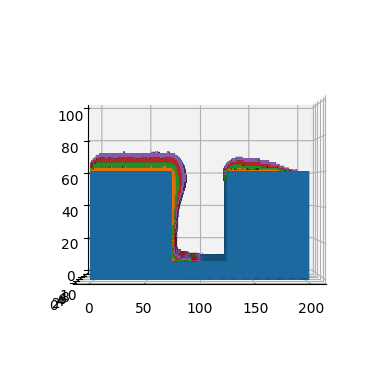

In [19]:
coordinates = [0, 0.21]

depofilm = depoML.depo(param = [1.6, -0.7], TS = 0.11, N = gen_dist_x.shape[0], sub_xy=coordinates)
depotest2 = depofilm.run(4, 125, gen_dist_x, gen_dist_y)

openWidth = 95

indice_wall = np.array(film[:, openWidth:200-openWidth, :] == 10)
# in_depo = np.logical_and(result[:, openWidth:200-openWidth, :] > 0, result[:, openWidth:200-openWidth, :] != 10)
in_depo = np.array(depotest2[:, openWidth:200-openWidth, :] == 20)
# in_depo2 = np.logical_and(result2[:, openWidth:200-openWidth, :] > 0, result2[:, openWidth:200-openWidth, :] != 10, result2[:, openWidth:200-openWidth, :] != 20)
in_depo2 = np.array(depotest2[:, openWidth:200-openWidth, :] == 40)
in_depo3 = np.array(depotest2[:, openWidth:200-openWidth, :] == 60)
in_depo4 = np.array(depotest2[:, openWidth:200-openWidth, :] == 80)
in_depo5 = np.array(depotest2[:, openWidth:200-openWidth, :] == 100)
in_depo6 = np.array(depotest2[:, openWidth:200-openWidth, :] == 120)
in_depo7 = np.array(depotest2[:, openWidth:200-openWidth, :] == 140)
in_depo8 = np.array(depotest2[:, openWidth:200-openWidth, :] == 160)
# in_depo = np.array(result > 0)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
ax.voxels(in_depo)
ax.voxels(in_depo2)
ax.voxels(in_depo3)
ax.voxels(in_depo4)
ax.voxels(in_depo5)
ax.voxels(in_depo6)
ax.voxels(in_depo7)
ax.voxels(in_depo8)
ax.view_init(elev=0, azim=-90, roll=0)

(999898,)


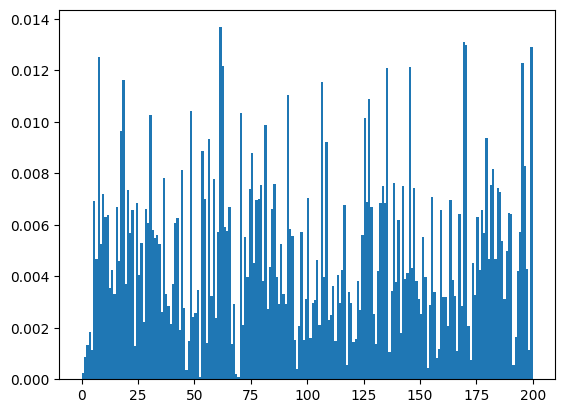

In [23]:
histData2 = result[83].data.cpu().numpy()
hist = np.array([])
r = 1
for i in range(histData2.shape[0]):
    inbin = np.random.rand(int(histData2[i]*1e6))*1
    hist = np.concatenate((hist, inbin + i*r))

print(hist.shape)
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(hist, bins=200, density=True)

909090.041155421


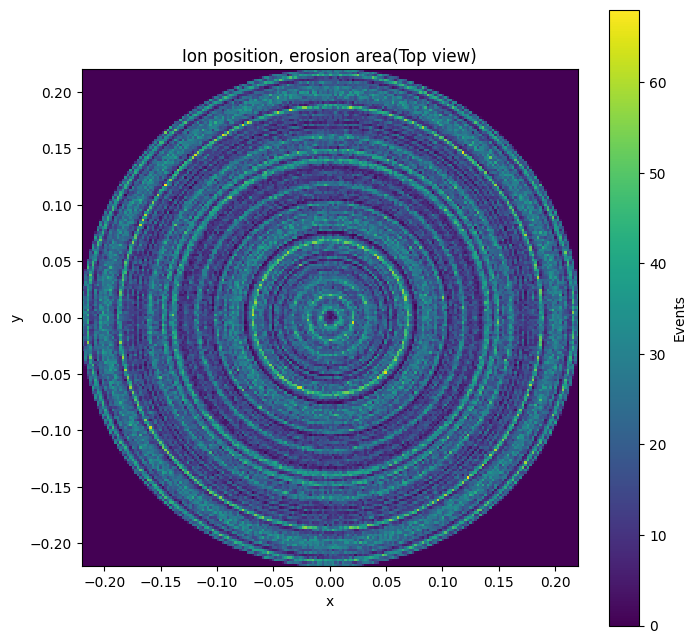

In [24]:
test_random = result[83].data.cpu().numpy()
test_random_norm = test_random/(np.sum(test_random))
test_random_norm = test_random_norm * 909090
distGen = test_random_norm
print(distGen.sum())
distNorm = distGen*np.linspace(0, 0.22, 201)[1:]*2*np.pi     
gen_dist_x = np.array([])
gen_dist_y = np.array([])
bins = 200
r = 0.22/bins
for i in range(bins):
    theta = np.random.rand(int(distNorm[i]))*2*np.pi
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.cos(theta))))
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(distNorm[i]))*r + i*r), np.sin(theta))))

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()